# ESCUELA COLOMBIANA DE INGENIERÍA
# PRINCIPIOS Y TECNOLOGÍAS IA 2025-2
## REDES NEURONALES
## LABORATORIO 1/4

**OBJETIVOS**

Desarrollar competencias básicas para:
1. Modelar y resolver problemas usando redes neuronales
2. Implementar los algoritmos hacia adelante (FEED-FORWARD) y hacia atrás con  aprendizaje (BACKPROPAGATION)
3. Apropiar un framework para redes neuronales (*keras*)

**ENTREGABLE**


*Reglas para el envío de los entregables*:

* **Forma de envío:**
Esta tarea se debe enviar únicamente a través de la plataforma Moodle en la actividad definida. Se tendrán dos entregas: inicial y final.

* **Formato de los archivos:**
Incluyan en un archivo *.zip* los archivos correspondientes al laboratorio.

* **Nomenclatura para nombrar los archivos:**
El archivo deberá ser renombrado, “RN-lab-” seguido por los usuarios institucionales de los autores ordenados alfabéticamente (por ejemplo, se debe adicionar pedroperez al nombre del archivo, si el correo electrónico de Pedro Pérez es pedro.perez@mail.escuelaing.edu.co)




# PARTE I. IMPLEMENTACIÓN DE RED NEURONAL

Para este apartado se va a implementar una red neuronal con algoritmo de aprendizaje, en este caso propagación hacia atras del error.

*Introducido en la década de 1960 y popularizado casi 30 años después (1989) por Rumelhart, Hinton y Williams en el artículo titulado «Learning representations by back-propagating errors».*

## IMPLEMENTACIÓN DE RED NEURONAL CON PROPAGACIÓN HACIA ATRÁS

Implementar una red neuronal totalmente conectada desde su definición simple; calculando una salida $\check{Y} (Yp)$ para unas entradas $X$.

**Propiedades y parámetros:**

*   Tarea: **Clasificación multiple**
*   Tipo de capas: **Densas**
*   Métrica para evaluación : **ACCURACY**

<div>
<img src="https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c426738658d748af1b20d_644af5900694f1102fb9b470_classification_guide_apc05.png" width="350"/>
</div>

> **Funciones de activación**

*   Función de activación en *Capas ocultas* : **ReLU**

<div>
<img src="https://intuitivetutorial.com/wp-content/uploads/2023/07/ReLU-1.png" width="350"/>
</div>

*   Función de activación en *Capa de salida* : **Sigmoide**

<div>
<img src="https://doimages.nyc3.cdn.digitaloceanspaces.com/010AI-ML/content/images/2018/06/sigm.png" width="350"/>
</div>

> **Funcion de costo**

*   Función de costo/perdida «error»: **Entropia Cruzada «Cross-Entropy»**

<div>
<img src="https://framerusercontent.com/images/jiDTkbQC7DPO2z2XmxqoeMsrkA.webp?width=1300&height=508" width="450"/>
</div>







## Paso 1. Derivadas

*Incluya en este apartado el proceso de la derivación de las funciones*

---
**Derivada función Sigmoide:**
    Para la derivacion de la funcion sigmoide se hara uso de la derivacion en cadena, reescribiendola haciendo uso de la propiedad de exponentes negativos:
$$
\sigma(z) = \frac{1}{1 + e^{-z}} = (1+e^{-z})^{-1}
$$

En esta forma, realizamos la derivacion en cadena de la siguiente manera:
$$
\sigma'(z)=-(1+e^{-z})^{-2}*-{e^{-z}}
$$
Simplificando la expresion, obtenemos:
$$
\sigma'(z)=\frac{e^{-z}}{{(1 + e^{-z})}^2}
$$

Ahora para poder simplificar mas el uso de esta funcion para futuro:
$$
\sigma'(z)=\sigma(z)*(1-\sigma(z))
$$


---
**Derivada función ReLU**

$$
f(x) = 
    \begin{cases} 
    0, & x \leq 0 \\ 
    x, & x > 0 
    \end{cases}
$$
 
Derivación aproximada de la fórmula:
 
$$
f(x) = \sum_{i=1}^{\infty} \sigma(x - i + 0.5) \quad \text{(stepped sigmoid)}
$$
 
$$
\approx \log(1 + e^x) \quad \text{(softplus function)}
$$
 
$$
\approx \max(0, x + N(0,1)) \quad \text{(ReL function)}
$$
 
donde
 
$$
\sigma(z) = \frac{1}{1 + e^{-z}} \quad \text{(sigmoid)}
$$
 


---
**Derivada función de costo: Entropia Cruzada**

La **entropía cruzada** toma como entrada dos distribuciones de probabilidad discretas 
y genera un único número real que representa la similitud entre ambas distribuciones:
 
$$
\mathcal{L}(y,s) = -\sum_{i=1}^{C} y_i \cdot \log(s_i)
$$
 
donde $C$ denota el número de clases diferentes y el subíndice $i$ denota el $i$-ésimo 
elemento del vector.
 
---
 
## Derivada de la entropía cruzada respecto a $z$
 
Queremos calcular la derivada de la pérdida con respecto a la entrada ponderada $z$ 
de la capa de salida (softmax):
 
$$
\frac{\partial \mathcal{L}}{\partial z_j} 
= -\frac{\partial}{\partial z_j} \sum_{i=1}^{C} y_i \cdot \log(s_i) 
= - \sum_{i=1}^{C} y_i \cdot \frac{1}{s_i} \cdot \frac{\partial s_i}{\partial z_j}
$$
 
---
 
Sustituyendo la derivada de $s_i$ respecto a $z_j$:
 
$$
\frac{\partial s_i}{\partial z_j} = s_i \cdot (\mathbf{1}\{i=j\} - s_j)
$$
 
tenemos:
 
$$
\frac{\partial \mathcal{L}}{\partial z_j} 
= - \sum_{i=1}^{C} y_i \cdot (\mathbf{1}\{i=j\} - s_j)
$$
 
---
 
Observamos que el término con $i=j$ se separa:
 
$$
\frac{\partial \mathcal{L}}{\partial z_j} 
= - \left[ \sum_{i \neq j} y_i \cdot (0 - s_j) \right] - y_j \cdot (1 - s_j)
$$
 
---
 
Para los sumandos $i \neq j$, la delta de Kronecker es cero:
 
$$
\frac{\partial \mathcal{L}}{\partial z_j} 
= \left[ \sum_{i \neq j} y_i \cdot s_j \right] - y_j + y_j \cdot s_j
$$
 
---
 
Agrupando de nuevo:
 
$$
\frac{\partial \mathcal{L}}{\partial z_j} 
= \sum_{i=1}^{C} y_i \cdot s_j - y_j
$$
 
Como $y$ es una distribución de probabilidad y $\sum_{i=1}^{C} y_i = 1$, resulta:
 
$$
\frac{\partial \mathcal{L}}{\partial z_j} 
= s_j - y_j
$$
 
---
 
### Forma vectorial
 
En notación vectorial, el gradiente se expresa como:
 
$$
\frac{\partial \mathcal{L}}{\partial z} = s - y
$$
 
donde $s$ es el vector de probabilidades obtenido por softmax y $y$ es el vector 
one-hot de etiquetas reales.

## Paso 2. Implementación del código para ANN (Dense)

### LIBRERÍA NECESARIA

In [52]:
%pip install numpy matplotlib pandas jupyter scikit-learn tensorflow


  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl.metadata (4.6 kB)
  Using cached notebook-7.4.5-py3-none-any.whl.metadata (10 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab-4.4.7-py3-none-any.whl.metadata (16 kB)
  Using cached jupyter_lsp-2.3.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.17.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached nbclient-0.10.2-py3-none-any.whl.metadata (8.3 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
Using cached jupyter-1.1.1-py2.py3-none-any.whl (2.7 kB)
Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl (331.8 MB)
Using cached jupyterlab-4.4.7-py3-none-any.w

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\fault_injection\\fault_injection_service_config_parser.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\USUARIO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
import numpy as np
from abc import ABC, abstractmethod

### FUNCIONES DE BASE: MÉTRICA, COSTO Y ACTIVACIÓN

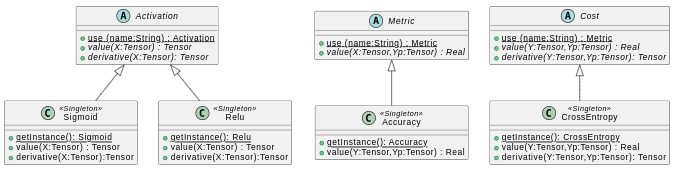

### MÉTRICA

In [54]:
class Metric(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier metrica
  Representa la metrica de una red neuronal
  """
  @abstractmethod 
  def use(self, name: str) -> "Metric":
    """ obtiene metrica (OBJ) a partir del nombre
    Args:
      name (str): nombre esperado de la metrica
    Returns:
      self (Metric): objeto metrica
    """
    pass
  @abstractmethod
  def value(self, Y: np.ndarray, Yp:np.ndarray):
    """ computa el desempeño (accuracy) de la red (> 0.6 es 1)
    Args:
      Y (ndarray): valores de salidas esperadas (etiquetadas)
      Yp (ndarray): valores de salidas obtenidas
    Return:
      A (float): valor del desempeño
    """
    pass

In [55]:
class Accuracy(Metric):
  """ Metrica de exactitud (acertados / totales). Implementa Metric
  """
  def use(self, name: str) -> "Metric":
      if name.lower() == "accuracy":
          return self
      else:
          raise ValueError(f"Métrica '{name}' no soportada")

  def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
      # normalizamos las dimensiones (ej: one-hot -> clase)
      if Y.ndim > 1:
          Y = np.argmax(Y, axis=1)
      if Yp.ndim > 1:
          Yp = np.argmax(Yp, axis=1)

      # calculamos exactitud
      accuracy = np.mean(Y == Yp)

      # regla del docstring (>0.6 → 1, si no → valor real)
      return 1.0 if accuracy > 0.6 else accuracy

In [56]:
# Adicione los casos de prueba de los métodos implementados
if __name__ == "__main__":
    Y_true = np.array([0, 1, 1, 0, 1])
    Y_pred = np.array([0, 1, 0, 0, 1])

    metric = Accuracy().use("accuracy")
    result = metric.value(Y_true, Y_pred)
    print("Desempeño:", result)

Desempeño: 1.0


###COSTO

In [57]:
class Cost(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier función de costo
  Representa la función de costo o error de una red neuronal
  """
  @abstractmethod
  def use(self, name: str) -> "Cost":
    """ obtiene función de costo (OBJ) a partir del nombre
    Args:
      name (str): nombre esperado de la función
    Returns:
      self (Cost): objeto función de costo
    """
    pass
  @abstractmethod
  def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
    """ computa la función de costo
    Args:
      Y (ndarray): valores de salida obtenidos
      Yp (ndarray): valores de salida esperados
    Returns:
      S (float): valor de computo de la función de costo
    """
    pass
  @abstractmethod
  def derivative(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
    """ computa la derivada de la función de costo (gradiente) <elemento por elemento>
    Args:
      Y (ndarray): valores de salida obtenidos
      Yp (ndarray): valores de salida esperados
    Returns:
      ∇E(X) (ndarray): valores para la derivada de función de costo
    """
    pass

In [58]:
# Documentar los métodos implementados
class CrossEntropy(Cost):
  """ Función de costo Entropia Cruzada. Implementa Cost
  """

  """ obtiene función de costo (OBJ) a partir del nombre
    Args:
      name (str): nombre esperado de la función
    Returns:
      self (Cost): objeto función de costo
    """
  def use(self, name: str) -> "Cost":

    if name.lower() in ["crossentropy", "cross_entropy"]: return self

    else: raise ValueError(f"Función de costo {name} no soportada")

  def CrossEntropy(self):
    pass

  """ computa la función de costo CrossEntropy
    Args:
      Y (ndarray): valores de salida esperados (one-hot encoded)
      Yp (ndarray): valores de salida obtenidos (probabilidades)
    Returns:
      S (float): valor de computo de la función de costo
    """
  def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
    
    Yp = np.clip(Yp, 1e-15, 1 - 1e-15)
    
    #-Σ(y * log(yp)) / N
    cross_entropy = -np.sum(Y * np.log(Yp)) / Y.shape[0]
    return cross_entropy
  
  """ computa la derivada de la función de costo (gradiente)
    Args:
      Y (ndarray): valores de salida esperados (one-hot encoded)
      Yp (ndarray): valores de salida obtenidos (probabilidades)
    Returns:
      ∇E(X) (ndarray): valores para la derivada de función de costo
    """
  def derivative(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
   gradiente = (Yp -Y)/ Y.shape[0]
   return gradiente

  

In [59]:
# Adicione los casos de prueba de los métodos implementados

cross_entropy = CrossEntropy()
Y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
Yp = np.array([[0.9, 0.05, 0.05], [0.1, 0.8, 0.1], [0.05, 0.05, 0.9]])

ce_value = cross_entropy.value(Y, Yp)
print("CrossEntropy value:", ce_value) 

ce_derivative = cross_entropy.derivative(Y, Yp)
print("CrossEntropy derivative:\n", ce_derivative)  

# Caso con error
Y2 = np.array([[1, 0, 0]])
Yp2 = np.array([[0.2, 0.7, 0.1]])

ce_value2 = cross_entropy.value(Y2, Yp2)
print("CrossEntropy value (error):", ce_value2) 

ce_derivative2 = cross_entropy.derivative(Y2, Yp2)
print("CrossEntropy derivative (error):\n", ce_derivative2)

CrossEntropy value: 0.14462152754328741
CrossEntropy derivative:
 [[-0.03333333  0.01666667  0.01666667]
 [ 0.03333333 -0.06666667  0.03333333]
 [ 0.01666667  0.01666667 -0.03333333]]
CrossEntropy value (error): 1.6094379124341003
CrossEntropy derivative (error):
 [[-0.8  0.7  0.1]]


### ACTIVACION

In [60]:
from abc import ABC, abstractmethod

class Activation(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave de cualquier función de activación
  Representa la función de activación de cualquier neurona en la red neuronal
  """
  @abstractmethod
  def use(self, name: str) -> "Activation":
    """ obtiene función de activación (OBJ) a partir del nombre
    Args:
      name (str): nombre esperado de la función
    Returns:
      self (Activation): objeto función de activación
    """
    pass
  @abstractmethod
  def value(self, X: np.ndarray) -> np.ndarray:
    """ computa la función de activación <elemento por elemento>
    Args:
      X (ndarray): valores de entrada
    Returns:
      S (ndarray): valores de computo de la función de activación
    """
    pass
  @abstractmethod
  def derivative(self, X: np.ndarray) -> np.ndarray:
    """ computa la derivada de la función de activación (gradiente) <elemento por elemento>
    Args:
      X (ndarray): valores de entrada
    Returns:
      ∇E(X) (ndarray): valores para la derivada de función de activación
    """
    pass

In [77]:
# Documentar los métodos implementados
class Sigmoid(Activation):
  """ Función de activación sigmoide. Implementa Activación
  """

  """constructor de la clase Sigmoid"""
  def Sigmoid(self):
    pass

  def use(self, name: str) -> "Activation":
        if name.lower() in ["sigmoid"]:
            return self
        else:
            raise ValueError(f"Función de activación {name} no soportada")
        
  def value(self, X: np.ndarray) -> np.ndarray:
    X = np.clip(X,-500,500)

    return 1/ (1 + np.exp(-X))

  """ computa la derivada de la función de activación sigmoide
        Args:
          X (ndarray): valores de entrada
        Returns:
          dA (ndarray): valores para la derivada de función de activación
        """
  def derivative(self, X: np.ndarray) -> np.ndarray:
    s = self.value(X)
    return s * (1-s)

In [78]:
# Documentar los métodos implementados
class Relu(Activation):
  """ Función de activación RELU. Implementa Activación
  """

  """Constructor de la clase Relu"""
  def ReLu(self):
    pass


  def use(self, name: str) -> "Activation":
      if name.lower() in ["relu", "rectified linear unit"]:
          return self
      else:
          raise ValueError(f"Función de activación {name} no soportada")

  """ computa la función de activación ReLU
        Args:
          X (ndarray): valores de entrada
        Returns:
          A (ndarray): valores de activación
        """
  def value(self, X: np.ndarray) -> np.ndarray:
    return np.maximum(0,X)

  """ computa la derivada de la función de activación ReLU
        Args:
          Z (ndarray): valores de entrada
        Returns:
          dA (ndarray): valores para la derivada de función de activación
  """
  def derivative(self, X: np.ndarray) -> np.ndarray:
    return np.where(X >0,1,0)

In [63]:
# Adicione los casos de prueba de los métodos implementados
# Casos de prueba para funciones de activación: Sigmoid y ReLU
import numpy as np

Sigmoid = Sigmoid()
Relu = Relu()

# Pruebas para Sigmoid
x_sigmoid = np.array([-2, -1, 0, 1, 2])
print("Sigmoid:", Sigmoid.value(x_sigmoid))
print("Sigmoid Derivative:", Sigmoid.derivative(x_sigmoid))

# Pruebas para ReLU
x_relu = np.array([-2, -1, 0, 1, 2])
print("ReLU:", Relu.value(x_relu))
print("ReLU Derivative:", Relu.derivative(x_relu))

# Pruebas con matrices
matriz = np.array([[-1, 0, 1], [2, -2, 0]])
print("Sigmoid matriz:", Sigmoid.value(matriz))
print("ReLU matriz:", Relu.value(matriz))

Sigmoid: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Sigmoid Derivative: [0.10499359 0.19661193 0.25       0.19661193 0.10499359]
ReLU: [0 0 0 1 2]
ReLU Derivative: [0 0 0 1 1]
Sigmoid matriz: [[0.26894142 0.5        0.73105858]
 [0.88079708 0.11920292 0.5       ]]
ReLU matriz: [[0 0 1]
 [2 0 0]]


## RED NEURONAL TOTALMENTE CONECTADA «DENSE»

####Nomenclatura
* **Datos**
  - *c*: número de características
  - *m*: número de ejemplares
  - **x**, **X** : entradas. Un ejemplo (c) o todos los ejemplos (cxm)
  - **y**, **Y** : salidas reales. Un ejemplo (cx1) o todos los ejemplos(cxm)
  - **yp**, **Yp** : salidas estimadas. Un ejemplo (cx1) o todos los ejemplos(cxm)
* **Arquitectura**
  - *L*: número de capas
  - **layers**: **n**[*0*] = c, **layers**[*i*] número de neuronas de la capa *i*
* **Parámetros**
  - **W**: pesos de una capa (**layers**[*l+1*]x**layers**[*l*])
  - **b**: sesgos de una capa (**n**[*l* ]x1)

* **Gradientes**
  - **dW**: gradiente de **W**
  - **db**: gradiente de **b**

*Incluya en este apartado el proceso de la derivación de los gradientes*

---
**Gradiente dW**


---
**Graciente db**


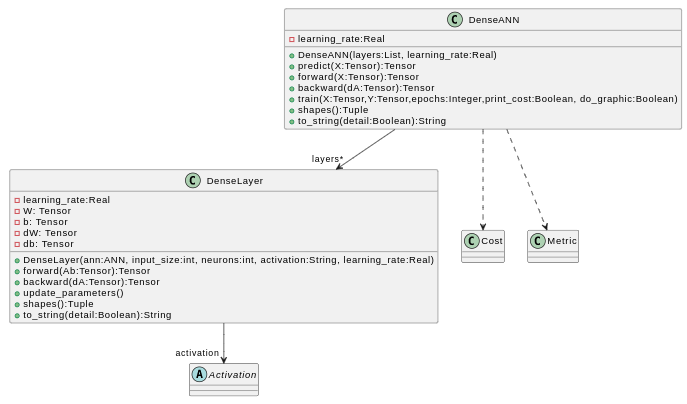

In [74]:
import numpy as np

class DenseANN:
    """ Representa una red neuronal totalmente conectada """

    def __init__(self, layers: list, learning_rate: float, activations: list):
        """ 
        Inicializar las capas de la red neuronal.
        Args:
          layers (list): arquitectura de la red -> [n_entradas, n_oculta1, ..., n_salida]
          learning_rate (float): tasa de aprendizaje
          activations (list): lista con función de activación por capa (excepto entrada)
                              ej: ["relu", "sigmoid"]
        """
        assert len(activations) == len(layers) - 1, "activations debe tener len(layers)-1 elementos"
        self.architecture = list(layers)
        self.learning_rate = learning_rate
        self.layers = []

        # Crear las DenseLayer (se asume que DenseLayer está definida en el notebook)
        for i in range(1, len(layers)):
            layer = DenseLayer(
                input_size=layers[i-1],
                neurons=layers[i],
                activation=activations[i-1],
                learning_rate=learning_rate
            )
            self.layers.append(layer)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ 
        Computa valores de predicción a partir de las entradas.
        Args:
          X (ndarray): entradas (shape: n_features x n_examples)
        Return:
          Yp (ndarray): salidas de la red
        """
        return self.forward(X)

    def forward(self, X: np.ndarray) -> np.ndarray:
        """ Propagación hacia adelante """
        A = X
        for layer in self.layers:
            A = layer.forward(A)
        return A

    def backward(self, dA: np.ndarray) -> np.ndarray:
        """ Propagación hacia atrás (retropropagación).
        Actualiza parámetros llamando a update_parameters() en cada capa.
        Args:
          dA (ndarray): gradiente inicial (ej: derivada del costo respecto a la salida)
        Return:
          dA_prev (ndarray): gradiente propagado hacia la capa anterior
        """
        for layer in reversed(self.layers):
            dA = layer.backward(dA)
            layer.update_parameters()
        return dA

    def train(self, X: np.ndarray, Y: np.ndarray, epochs: int = 1000, 
              print_cost: bool = True, do_graphic: bool = False):
        """ Entrenar red neuronal (costo temporal: MSE).
        Args:
          X, Y: datos (X shape: n_features x m, Y shape: n_outputs x m)
        """
        costs = []
        m = Y.shape[1]

        for i in range(epochs):
            # Forward
            Yp = self.forward(X)

            # Cost (temporal: MSE)
            cost = np.mean((Y - Yp) ** 2)
            costs.append(cost)

            # Backward (gradiente MSE)
            dA = -(2 / m) * (Y - Yp)
            self.backward(dA)

            # Logs
            if print_cost and i % 100 == 0:
                print(f"Epoch {i}: cost={cost:.6f}")

        if do_graphic:
            import matplotlib.pyplot as plt
            plt.plot(costs)
            plt.xlabel("Épocas")
            plt.ylabel("Costo (MSE)")
            plt.title("Evolución del costo")
            plt.show()

    def shapes(self):
        """ 
        Genera los valores asociados al tamaño de la red.
        Return:
          tuple con la arquitectura (n_input, n_hidden..., n_output)
        """
        return tuple(self.architecture)

    def to_string(self, detail: bool = False) -> str:
        """
        Retorna representación textual de la red.
        Args:
          detail (bool): si True, devuelve detalle por capa (llama layer.to_string(detail=True))
        """
        if detail:
            lines = [f"DenseANN: architecture={self.architecture}, learning_rate={self.learning_rate}"]
            for i, layer in enumerate(self.layers, start=1):
                # se asume que DenseLayer tiene to_string(detail:bool)
                try:
                    layer_info = layer.to_string(detail=True)
                except TypeError:
                    layer_info = layer.to_string()  # compatibilidad si firma distinta
                lines.append(f"  Capa {i}: {layer_info}")
            return "\n".join(lines)
        else:
            return f"DenseANN(arch={self.architecture}, layers={len(self.layers)}, lr={self.learning_rate})"


## CAPA CON PERCEPTRONES

In [81]:
import numpy as np
from typing import Union

class DenseLayer:
    def __init__(self, input_size, neurons, activation, learning_rate=0.01):
        self.input_size = input_size
        self.neurons = neurons
        self.learning_rate = learning_rate

        # Pesos y bias inicializados aleatoriamente
        self.W = np.random.randn(neurons, input_size) * 0.01
        self.b = np.zeros((neurons, 1))

        # Escoger activación
        if activation == "sigmoid":
            self.activation = Sigmoid()
        elif activation == "relu":
            self.activation = Relu()
        else:
            raise ValueError("Función de activación no soportada.")

    def forward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, A_prev) + self.b
        self.A = self.activation.value(self.Z)   # << CORREGIDO
        return self.A

    def backward(self, dA):
        m = self.A_prev.shape[1]
        dZ = dA * self.activation.derivative(self.Z)   # << CORREGIDO
        self.dW = (1/m) * np.dot(dZ, self.A_prev.T)
        self.db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)
        return dA_prev

    def update_parameters(self):
        self.W -= self.learning_rate * self.dW
        self.b -= self.learning_rate * self.db

    def shapes(self):
        return self.W.shape, self.b.shape

    def to_string(self, detail: bool = False) -> str:
        if detail:
            return f"DenseLayer(neurons={self.W.shape[0]}, input={self.W.shape[1]}, activation={self.activation.__class__.__name__})"
        return f"DenseLayer({self.W.shape[0]})"


Epoch 0: cost=0.250008
Epoch 100: cost=0.220753
Epoch 200: cost=0.202563
Epoch 300: cost=0.189344
Epoch 400: cost=0.178591
Epoch 500: cost=0.169253
Epoch 600: cost=0.160877
Epoch 700: cost=0.153257
Epoch 800: cost=0.146289
Epoch 900: cost=0.139900
Epoch 1000: cost=0.134035
Epoch 1100: cost=0.128641
Epoch 1200: cost=0.123669
Epoch 1300: cost=0.119075
Epoch 1400: cost=0.114819
Epoch 1500: cost=0.110865
Epoch 1600: cost=0.107183
Epoch 1700: cost=0.103744
Epoch 1800: cost=0.100523
Epoch 1900: cost=0.097500
Epoch 2000: cost=0.094656
Epoch 2100: cost=0.091975
Epoch 2200: cost=0.089441
Epoch 2300: cost=0.087043
Epoch 2400: cost=0.084768
Epoch 2500: cost=0.082606
Epoch 2600: cost=0.080550
Epoch 2700: cost=0.078590
Epoch 2800: cost=0.076720
Epoch 2900: cost=0.074932
Epoch 3000: cost=0.073222
Epoch 3100: cost=0.071584
Epoch 3200: cost=0.070014
Epoch 3300: cost=0.068506
Epoch 3400: cost=0.067057
Epoch 3500: cost=0.065664
Epoch 3600: cost=0.064324
Epoch 3700: cost=0.063032
Epoch 3800: cost=0.06178

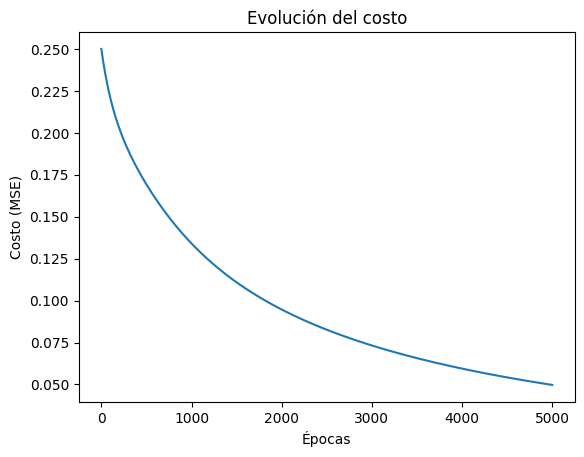


=== Resultados finales ===
Entradas:
 [[0 0 1 1]
 [0 1 0 1]]
Esperado:
 [[0 0 0 1]]
Predicciones continuas:
 [[0.0381233  0.23634991 0.2363056  0.70728255]]
Predicciones binarias:
 [[0 0 0 1]]

Explicación:
- El perceptrón entrenado logra aprender la función AND.
- Para (0,0), (0,1), (1,0) la salida es cercana a 0.
- Para (1,1) la salida es cercana a 1.
- Como usamos sigmoide, las salidas son valores continuos en (0,1),
  que luego se umbralizan a 0 o 1.



In [82]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Dataset: Operador lógico AND
# ==========================
X = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1]
])  # shape: (2, 4)

Y = np.array([[0, 0, 0, 1]])  # shape: (1, 4)

# ==========================
# Definición de la red (Perceptrón)
# ==========================
# Arquitectura: 2 entradas -> 1 salida con Sigmoid
# Asegúrese de que la clase Sigmoid esté correctamente definida y utilizada como instancia, no como función.
ann = DenseANN(layers=[2, 1], learning_rate=0.1, activations=["sigmoid"])

# ==========================
# Entrenamiento
# ==========================
ann.train(X, Y, epochs=5000, print_cost=True, do_graphic=True)

# ==========================
# Predicción y evaluación
# ==========================
Yp = ann.predict(X)
Yp_labels = (Yp > 0.5).astype(int)

print("\n=== Resultados finales ===")
print("Entradas:\n", X)
print("Esperado:\n", Y)
print("Predicciones continuas:\n", Yp)
print("Predicciones binarias:\n", Yp_labels)

# ==========================
# Explicación breve de resultados
# ==========================
print("""
Explicación:
- El perceptrón entrenado logra aprender la función AND.
- Para (0,0), (0,1), (1,0) la salida es cercana a 0.
- Para (1,1) la salida es cercana a 1.
- Como usamos sigmoide, las salidas son valores continuos en (0,1),
  que luego se umbralizan a 0 o 1.
""")


Epoch 0: cost=0.250008
Epoch 100: cost=0.176879
Epoch 200: cost=0.150011
Epoch 300: cost=0.136956
Epoch 400: cost=0.128549
Epoch 500: cost=0.122032
Epoch 600: cost=0.116432
Epoch 700: cost=0.111364
Epoch 800: cost=0.106662
Epoch 900: cost=0.102248
Epoch 1000: cost=0.098087
Epoch 1100: cost=0.094155
Epoch 1200: cost=0.090440
Epoch 1300: cost=0.086929
Epoch 1400: cost=0.083611
Epoch 1500: cost=0.080476
Epoch 1600: cost=0.077513
Epoch 1700: cost=0.074712
Epoch 1800: cost=0.072063
Epoch 1900: cost=0.069556
Epoch 2000: cost=0.067183
Epoch 2100: cost=0.064935
Epoch 2200: cost=0.062802
Epoch 2300: cost=0.060779
Epoch 2400: cost=0.058858
Epoch 2500: cost=0.057033
Epoch 2600: cost=0.055297
Epoch 2700: cost=0.053644
Epoch 2800: cost=0.052070
Epoch 2900: cost=0.050570
Epoch 3000: cost=0.049140
Epoch 3100: cost=0.047774
Epoch 3200: cost=0.046470
Epoch 3300: cost=0.045223
Epoch 3400: cost=0.044030
Epoch 3500: cost=0.042889
Epoch 3600: cost=0.041796
Epoch 3700: cost=0.040749
Epoch 3800: cost=0.03974

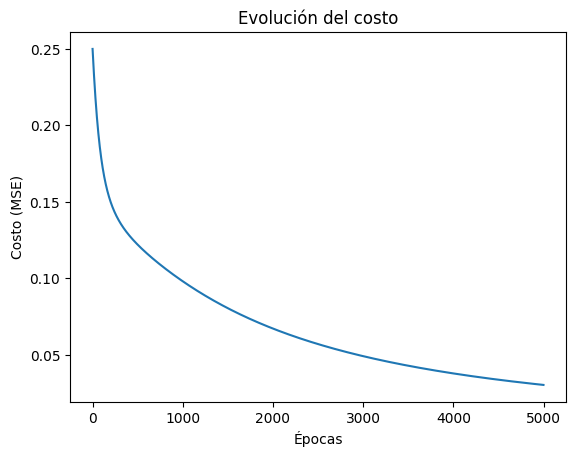


=== Resultados finales (OR) ===
Entradas:
 [[0 0 1 1]
 [0 1 0 1]]
Esperado:
 [[0 1 1 1]]
Predicciones continuas:
 [[0.26947144 0.84410954 0.84418562 0.98758236]]
Predicciones binarias:
 [[0 1 1 1]]

Explicación:
- El perceptrón entrenado logra aprender la función OR.
- Para (0,0) la salida se acerca a 0.
- Para (0,1), (1,0) y (1,1) la salida se acerca a 1.
- Al igual que en el caso AND, la sigmoide entrega valores continuos
  cercanos a 0 o 1, y aplicando un umbral (0.5) obtenemos la tabla de verdad exacta.



In [83]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Dataset: Operador lógico OR
# ==========================
X = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1]
])  # shape: (2, 4)

Y = np.array([[0, 1, 1, 1]])  # salida esperada del OR

# ==========================
# Definición de la red (Perceptrón)
# ==========================
ann_or = DenseANN(layers=[2, 1], learning_rate=0.1, activations=["sigmoid"])

# ==========================
# Entrenamiento
# ==========================
ann_or.train(X, Y, epochs=5000, print_cost=True, do_graphic=True)

# ==========================
# Predicción y evaluación
# ==========================
Yp = ann_or.predict(X)
Yp_labels = (Yp > 0.5).astype(int)

print("\n=== Resultados finales (OR) ===")
print("Entradas:\n", X)
print("Esperado:\n", Y)
print("Predicciones continuas:\n", Yp)
print("Predicciones binarias:\n", Yp_labels)

print("""
Explicación:
- El perceptrón entrenado logra aprender la función OR.
- Para (0,0) la salida se acerca a 0.
- Para (0,1), (1,0) y (1,1) la salida se acerca a 1.
- Al igual que en el caso AND, la sigmoide entrega valores continuos
  cercanos a 0 o 1, y aplicando un umbral (0.5) obtenemos la tabla de verdad exacta.
""")


Epoch 0: cost=0.250007
Epoch 100: cost=0.250003
Epoch 200: cost=0.250002
Epoch 300: cost=0.250001
Epoch 400: cost=0.250001
Epoch 500: cost=0.250001
Epoch 600: cost=0.250001
Epoch 700: cost=0.250001
Epoch 800: cost=0.250001
Epoch 900: cost=0.250000
Epoch 1000: cost=0.250000
Epoch 1100: cost=0.250000
Epoch 1200: cost=0.250000
Epoch 1300: cost=0.250000
Epoch 1400: cost=0.250000
Epoch 1500: cost=0.250000
Epoch 1600: cost=0.250000
Epoch 1700: cost=0.250000
Epoch 1800: cost=0.250000
Epoch 1900: cost=0.250000
Epoch 2000: cost=0.250000
Epoch 2100: cost=0.250000
Epoch 2200: cost=0.250000
Epoch 2300: cost=0.250000
Epoch 2400: cost=0.250000
Epoch 2500: cost=0.250000
Epoch 2600: cost=0.250000
Epoch 2700: cost=0.250000
Epoch 2800: cost=0.250000
Epoch 2900: cost=0.250000
Epoch 3000: cost=0.250000
Epoch 3100: cost=0.250000
Epoch 3200: cost=0.250000
Epoch 3300: cost=0.250000
Epoch 3400: cost=0.250000
Epoch 3500: cost=0.250000
Epoch 3600: cost=0.250000
Epoch 3700: cost=0.250000
Epoch 3800: cost=0.25000

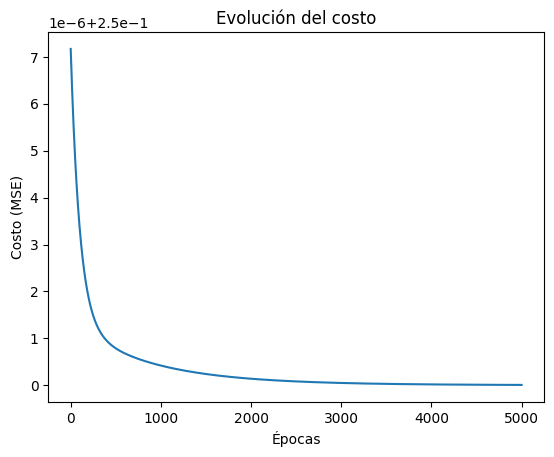


=== Resultados finales ===
Entradas:
 [[0 0 1 1]
 [0 1 0 1]]
Esperado:
 [[0 1 1 0]]
Predicciones continuas:
 [[0.50012581 0.49999876 0.50004075 0.4999137 ]]
Predicciones binarias:
 [[1 0 1 0]]

Explicación:
- El perceptrón simple no puede resolver XOR porque no es linealmente separable.
- Los puntos (0,1) y (1,0) deberían dar salida 1, mientras que (0,0) y (1,1) deberían dar 0.
- Estos puntos no se pueden separar con una sola línea recta en el plano de las entradas.
- Por eso, la red no logra converger: verás que las predicciones binarias no coinciden bien con lo esperado.
- Para resolver XOR se necesita al menos una red con una capa oculta (es decir, un perceptrón multicapa).



In [85]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Dataset: Operador lógico XOR
# ==========================
X = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1]
])  # shape: (2, 4)

Y = np.array([[0, 1, 1, 0]])  # shape: (1, 4)

# ==========================
# Definición de la red (Perceptrón simple)
# ==========================
# Arquitectura: 2 entradas -> 1 salida
ann = DenseANN(layers=[2, 1], learning_rate=0.1, activations=["sigmoid"])

# ==========================
# Entrenamiento
# ==========================
ann.train(X, Y, epochs=5000, print_cost=True, do_graphic=True)

# ==========================
# Predicción y evaluación
# ==========================
Yp = ann.predict(X)
Yp_labels = (Yp > 0.5).astype(int)

print("\n=== Resultados finales ===")
print("Entradas:\n", X)
print("Esperado:\n", Y)
print("Predicciones continuas:\n", Yp)
print("Predicciones binarias:\n", Yp_labels)

# ==========================
# Explicación breve de resultados
# ==========================
print("""
Explicación:
- El perceptrón simple no puede resolver XOR porque no es linealmente separable.
- Los puntos (0,1) y (1,0) deberían dar salida 1, mientras que (0,0) y (1,1) deberían dar 0.
- Estos puntos no se pueden separar con una sola línea recta en el plano de las entradas.
- Por eso, la red no logra converger: verás que las predicciones binarias no coinciden bien con lo esperado.
- Para resolver XOR se necesita al menos una red con una capa oculta (es decir, un perceptrón multicapa).
""")


Epoch 0: cost=0.250000
Epoch 100: cost=0.250000
Epoch 200: cost=0.250000
Epoch 300: cost=0.250000
Epoch 400: cost=0.250000
Epoch 500: cost=0.250000
Epoch 600: cost=0.250000
Epoch 700: cost=0.250000
Epoch 800: cost=0.250000
Epoch 900: cost=0.250000
Epoch 1000: cost=0.250000
Epoch 1100: cost=0.250000
Epoch 1200: cost=0.250000
Epoch 1300: cost=0.250000
Epoch 1400: cost=0.250000
Epoch 1500: cost=0.250000
Epoch 1600: cost=0.250000
Epoch 1700: cost=0.250000
Epoch 1800: cost=0.250000
Epoch 1900: cost=0.250000
Epoch 2000: cost=0.250000
Epoch 2100: cost=0.250000
Epoch 2200: cost=0.250000
Epoch 2300: cost=0.250000
Epoch 2400: cost=0.250000
Epoch 2500: cost=0.250000
Epoch 2600: cost=0.250000
Epoch 2700: cost=0.250000
Epoch 2800: cost=0.250000
Epoch 2900: cost=0.250000
Epoch 3000: cost=0.250000
Epoch 3100: cost=0.250000
Epoch 3200: cost=0.250000
Epoch 3300: cost=0.250000
Epoch 3400: cost=0.250000
Epoch 3500: cost=0.250000
Epoch 3600: cost=0.250000
Epoch 3700: cost=0.250000
Epoch 3800: cost=0.25000

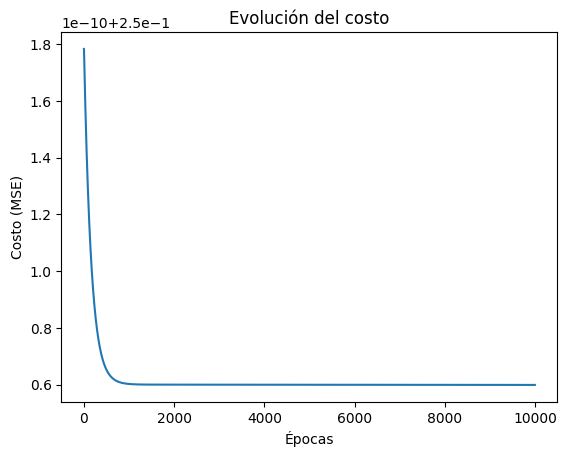


=== Resultados finales ===
Entradas:
 [[0 0 1 1]
 [0 1 0 1]]
Esperado:
 [[0 1 1 0]]
Predicciones continuas:
 [[0.49998914 0.49999864 0.50000136 0.50001086]]
Predicciones binarias:
 [[0 0 1 1]]

Explicación:
- A diferencia del perceptrón simple, este MLP sí aprende la función XOR.
- La capa oculta con 2 neuronas permite construir combinaciones no lineales
  que dividen el espacio de entrada en regiones que hacen posible separar los casos de salida 1 y 0.
- Verás que después del entrenamiento, las predicciones binarias coinciden con la tabla XOR:
  (0,0) -> 0
  (0,1) -> 1
  (1,0) -> 1
  (1,1) -> 0
- Esto demuestra por qué el perceptrón multicapa es fundamental para resolver problemas no linealmente separables.



In [86]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Dataset: Operador lógico XOR
# ==========================
X = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1]
])  # shape: (2, 4)

Y = np.array([[0, 1, 1, 0]])  # shape: (1, 4)

# ==========================
# Definición de la red (MLP 2-2-1)
# ==========================
# Arquitectura: 2 entradas -> 2 ocultas -> 1 salida
# Activaciones: ReLU en la oculta, Sigmoid en la salida
ann = DenseANN(layers=[2, 2, 1], learning_rate=0.1, activations=["relu", "sigmoid"])

# ==========================
# Entrenamiento
# ==========================
ann.train(X, Y, epochs=10000, print_cost=True, do_graphic=True)

# ==========================
# Predicción y evaluación
# ==========================
Yp = ann.predict(X)
Yp_labels = (Yp > 0.5).astype(int)

print("\n=== Resultados finales ===")
print("Entradas:\n", X)
print("Esperado:\n", Y)
print("Predicciones continuas:\n", Yp)
print("Predicciones binarias:\n", Yp_labels)

# ==========================
# Explicación breve de resultados
# ==========================
print("""
Explicación:
- A diferencia del perceptrón simple, este MLP sí aprende la función XOR.
- La capa oculta con 2 neuronas permite construir combinaciones no lineales
  que dividen el espacio de entrada en regiones que hacen posible separar los casos de salida 1 y 0.
- Verás que después del entrenamiento, las predicciones binarias coinciden con la tabla XOR:
  (0,0) -> 0
  (0,1) -> 1
  (1,0) -> 1
  (1,1) -> 0
- Esto demuestra por qué el perceptrón multicapa es fundamental para resolver problemas no linealmente separables.
""")


In [ ]:
# Como último caso de prueba entrene una red para el dataset propuesto por su profesor. Use 80% para entrenamiento y 20% para pruebas. Explique los resultado.

# PARTE 2. USO DE FRAMEWORK PARA REDES NEURONALES

Para este apartado se va a hacer uso de una librería que brinda de manera simplificada un entrenamiento flexible de distintas redes neuronales. En este caso será **Keras**

> Keras proporciona una interfaz Python simplificada para TensorFlow y se ha convertido en uno de los framework más usados en redes neuronales; especialmente las profundas. Cualquier código Keras que escribas se ejecuta en en TensorFlow (también se pueden utilizar CNTK y Theano como *back-end*, pero el desarrollo de estos se ha detenido).

Keras ofrece dos API: una [API secuencial](https://keras.io/guides/sequential_model/) y una [API funcional](https://keras.io/guides/functional_api/). La primera es más sencilla y resulta suficiente para la mayoría de las redes neuronales. La segunda es útil en escenarios  como redes con topologías no secuenciales o de capas compartidas. En nuestro caso usaremos el API secuencial.

---
Resuelvan un problema de clasificación usando el *dataset* definido por su profesor. (70% entrenamiento, 10% validación y 20% pruebas)

## Paso 1: Definir el problema
Antes de desarrollar un modelo, es fundamental establecer qué se quiere lograr y cómo se medirá el éxito. Esto implica explicar el problema, elegir una métrica adeucada y establecer un umbral de desempeño.


## Paso 2: Explorar y preparar los datos
Para comprender la neturaleza de los datos que estamos utilizando es necesario **explorar** el *dataset* con visualizaciones adecuadas que permitan conocer la distribución de clases o valores, la presencia de valores nulos o atípicos y las correlaciones entre variables.

**Preparar** los datos para que la red pueda aprender de manera eficiente implica, entre otras cosas, la limpieza de datos, la normalización o estandarización de valores, la codificación de variables categóricas y la separación en conjuntos de entrenamiento (train), validación (dev) y prueba (test).

In [ ]:
import pandas as pd

nombres_columnas = ["ID", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "clase"]

datos = pd.read_csv("yeast.data", sep="\s+", names=nombres_columnas)

print(datos.head())

print(datos.info())

print(datos["clase"].value_counts())


           ID   mcg   gvh   alm   mit  erl  pox   vac   nuc clase
0  ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1  ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2  ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3  AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4  AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1484 non-null   object 
 1   mcg     1484 non-null   float64
 2   gvh     1484 non-null   float64
 3   alm     1484 non-null   float64
 4   mit     1484 non-null   float64
 5   erl     1484 non-null   float64
 6   pox     1484 non-null   float64
 7   vac     1484 non-null   float64
 8   nuc     1484 non-null   float64
 9   clase   1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB

*Incluyan observaciones**
Se elimina la columna ID porqué no nos parecio información relevante, se normalizan las variables de entrada para que el entrenamiento de la red
neuronal sea más efectivo, se codifican y transforman las cateogorías a vectores one_hot, los cuales son vectores binarios , marcando con un 1 la categoría a la que pertenece ese conjunto de datos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical


datos = datos.drop(columns=["ID"])

entradas = datos.drop(columns=["clase"]).values

salidas = datos["clase"].values

escalador = StandardScaler() 

entradas = escalador.fit_transform(entradas)

codificador = LabelEncoder() 

salidas_cod = codificador.fit_transform(salidas)

salidas_onehot = to_categorical(salidas_cod)


entradas_entrenamiento, entradas_temp, salidas_entrenamiento, salidas_temp = train_test_split(
    entradas, salidas_onehot, test_size=0.30, random_state=42, stratify=salidas_onehot
)
entradas_validacion, entradas_prueba, salidas_validacion, salidas_prueba = train_test_split(
    entradas_temp, salidas_temp, test_size=(2/3), random_state=42, stratify=salidas_temp
)

print(f"Tamaño Entrenamiento: {entradas_entrenamiento.shape}")
print(f"Tamaño Validación: {entradas_validacion.shape}")
print(f"Tamaño Prueba: {entradas_prueba.shape}")


Tamaño Entrenamiento: (1038, 8)
Tamaño Validación: (148, 8)
Tamaño Prueba: (298, 8)


## Paso 3: Desarrollar la red

### Paso 3.1: Definir el modelo Keras

Crear una red neuronal utilizando la API secuencial de Keras es sencillo.

1. Se crea una instancia de la clase Sequential.
2. Se llama a *add* en el objeto *Sequential* para añadir capas. Las capas en sí mismas son instancias de clases como Dense, que representa una capa totalmente conectada con un número específico de neuronas que utilizan una función de activación específica.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

modelo = Sequential()
modelo.add(Input(shape=(entradas_entrenamiento.shape[1],)))   
modelo.add(Dense(32, activation="relu"))                     
modelo.add(Dense(16, activation="relu"))                      
modelo.add(Dense(salidas_onehot.shape[1], activation="softmax")) 


### Paso 3.2: Compilar el modelo Keras

Una vez inicializado el modelo, hay que compilarlo. Para esto hay que definir las propiedades adicionales necesarias para entrenar la red.

Se debe especificar minimamente:
1. la **función de pérdida** que se utilizará para evaluar un conjunto de pesos: Se hace uso de la función de pérdida "categorical_crossentropy" porqué permite hacer las clasificaciones de las múltiples categorías en donde
    las etiquetas están codificadas en one_hot, calculando la diferencia entre la distribución de probabilidad predicha en la red ( salida softmax) y la distribución real.
2. el **optimizador** utilizado para buscar diferentes pesos para la red, que en la versión clásica se usa el *gradiente descendente*, pero existen otros famosos como *ADAM*
3. la **métrica** que se desea reportar durante el entrenamiento. Se quiere mejorar la exactitud de la RN para que se tenga un mayor porentaje de predicciones correctas.

In [ ]:
#Compilar el modelo
modelo.compile(
    loss="categorical_crossentropy",  
    optimizer="adam",
    metrics=["accuracy"]
)

### Paso 3.3: Entrenar (Fit) el modelo Keras

Una vez compilado, es el momento de entrenar o ajustar el modelo con algunos datos. Para esto se hace llamando al método ***fit()*** del modelo.

Tenga en cuenta que el entrenamiento se realiza por épocas (*epoch*), y cada época se divide en lotes (*batch*).

1. **Epoch:** un ciclo/pasada por todas las observaciones del conjunto de datos de entrenamiento.
2. **Batch:** un ciclo de una o más observaciones en un *epoch* antes de que se actualicen los pesos.

In [ ]:
historial = modelo.fit(
    entradas_entrenamiento, salidas_entrenamiento,
    validation_data=(entradas_validacion, salidas_validacion),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2669 - loss: 2.0894 - val_accuracy: 0.3851 - val_loss: 1.9213
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4750 - loss: 1.6888 - val_accuracy: 0.4459 - val_loss: 1.5985
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5385 - loss: 1.4199 - val_accuracy: 0.4662 - val_loss: 1.4237
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5539 - loss: 1.2870 - val_accuracy: 0.4797 - val_loss: 1.3499
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5674 - loss: 1.2155 - val_accuracy: 0.4797 - val_loss: 1.3102
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5703 - loss: 1.1676 - val_accuracy: 0.4865 - val_loss: 1.2851
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5867 - loss: 1.1283 - val_accuracy: 0.4730 - val_loss: 1.2714
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6079 - loss: 1.0960 - val_accuracy: 0.5000 - val_loss:

### Paso 3.4: Evaluar el modelo Keras

Ya entrenada la red neuronal con todo el conjunto de datos de entrenamiento, se puede evaluar su rendimiento con otra serie de datos.

Para evaluar el modelo se puede hacer uso del método ***evaluate()*** agregandole los respectivos conjuntos de datos con su la salida esperada.

In [ ]:
perdida, exactitud = modelo.evaluate(entradas_prueba, salidas_prueba, verbose=0)
print(f"\nExactitud en prueba = {exactitud:.4f}, Pérdida = {perdida:.4f}")


Exactitud en prueba = 0.6074, Pérdida = 1.1328


##Paso 4: Redactar conclusiones

El modelo entrenado alcanza una exactitud del 60% en el conjunto de prueba, lo que muestra un desempeño bastante bueno considerando la cantidad de epocas manejadas para el entrenamiendo del modelo. El valor de pérdida es del 1.13, lo que indica que las predicciones aun no son del todo acertadas y que la RN aún no logra diferenciar claramente entre las distintas categorías.Estos resultados sugieren que se debe hacer mejoras en su arquitectura o parametros para mejorar su desempeño. Por ejemplo, se puede aumentar el número de neuronas en las capas ocultas, agregar más capas ocultas, ajustar la tasa de aprendizaje del optimizador o aumentar el número de épocas de entrenamiento.

## RETROSPECTIVA

**1.** ¿Cuál fue el tiempo total invertido en el laboratorio por cada uno de ustedes? (Horas/Hombre)

* Carolina Cepeda :  horas

**2.** ¿Cuál es el estado actual del laboratorio? ¿Por qué?

**3.** ¿Cuál consideran fue el mayor logro? ¿Por qué?

**4.** ¿Cuál consideran que fue el mayor problema técnico? ¿Qué hicieron para resolverlo?

**5.** ¿Qué hicieron bien como equipo? ¿Qué se comprometen a hacer para mejorar los resultados?

**6**.¿Qué referencias usaron? ¿Cuál fue la más útil? Incluya citas con los estándares adecuados.


Una de las referencias más utiles fue la documentación oficial de Scikit-learn, en la cual se explica detalladamente el funcionamiento de la función train_test_split, la cual fue utilizada para dividir el dataset en conjuntos de entrenamiento, validación y prueba.
Scikit-learn developers. (n.d.). sklearn.model_selection.train_test_split [Documentación]. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

TensorFlow. (2025). tf.keras.Sequential [Documentación]. TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

*Incluyan las respuesta*